##1. more detailed psedu-code simple RNN ##

In [0]:
state_t = 0 #This is the state at t
for input_t in input_sequence: 
  output_t = f(input_t, state_t) # `f` is our "step function"
# output_t = activation(dot(w, input_t) + dot(U, state_t) + b)
  state_t = output_t

##2. Implementation of a simple RNN (Numpy)##

In [0]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

# input data (random)
inputs = np.random.random((timesteps, input_features))

# initial state: an all-zero vector
state_t = np.zeros((output_features,))

# create random weight matrices
W = np.random.random((input_features, output_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  successive_outputs.append(output_t)
  state_t = output_t
  
final_output_sequence = np.concatenate(successive_outputs, axis=0)
print(final_output_sequence)

##3. RNN in Keras##

In [13]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding

model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 36,160
Trainable params: 36,160
Non-trainable params: 0
_________________________________________________________________


##IMDB using RNN##

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)
Loading model...
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.6405 - acc: 0.6157 - val_loss: 0.5296 - val_acc: 0.7290
Epoch 2/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.4128 - acc: 0.8260 - val_loss: 0.4177 - val_acc: 0.8186
Epoch 3/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.3109 - acc: 0.8732 - val_loss: 0.4240 - val_acc: 0.8048
Epoch 4/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.2446 - acc: 0.9054 - val_loss: 0.3730 - val_acc: 0.8420
Epoch 5/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.1844 - acc: 0.9307 - val_loss: 0.3920 - val_acc: 0.8628
Epoch 6/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1221 - acc: 0.9

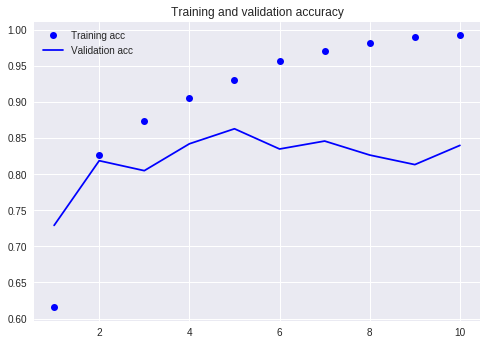

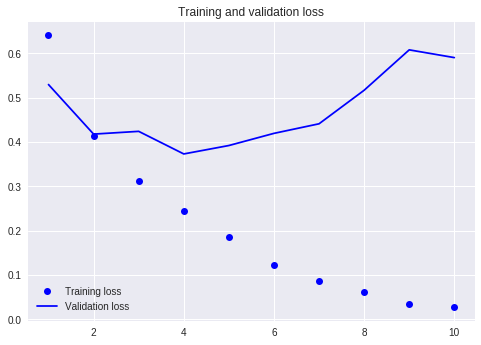

In [16]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

print('Loading model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(input_train, 
                   y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)
print('Plotting...')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# -----Not Finished Yet ------
